# Multi-Layer Perceptron

In [1]:
from dataset_loader import load_dataset

path = "loan_data.csv"
dataset = load_dataset(path)
data = dataset.drop("loan_status", axis=1)
targets = dataset["loan_status"]

print(data.shape)

(44993, 13)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data, test_data, train_labels, test_labels = train_test_split(data, targets, train_size=0.7, random_state=1)

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Building the model

model = Sequential([
    # Input layer
    Input(shape=(train_data_scaled.shape[1],)),

    # Hidden layers
    Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    # Output layer
    Dense(1, activation="sigmoid")
])

optimizer = Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,745 (14.63 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Train model

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(train_data_scaled, train_labels, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)


Epoch 1/50
788/788 - 5s - 6ms/step - accuracy: 0.6328 - loss: 0.8088 - val_accuracy: 0.8589 - val_loss: 0.4756
Epoch 2/50
788/788 - 2s - 3ms/step - accuracy: 0.7714 - loss: 0.5995 - val_accuracy: 0.8835 - val_loss: 0.4017
Epoch 3/50
788/788 - 2s - 3ms/step - accuracy: 0.8235 - loss: 0.5078 - val_accuracy: 0.8882 - val_loss: 0.3673
Epoch 4/50
788/788 - 2s - 3ms/step - accuracy: 0.8473 - loss: 0.4613 - val_accuracy: 0.8908 - val_loss: 0.3489
Epoch 5/50
788/788 - 2s - 3ms/step - accuracy: 0.8567 - loss: 0.4350 - val_accuracy: 0.8940 - val_loss: 0.3368
Epoch 6/50
788/788 - 2s - 3ms/step - accuracy: 0.8615 - loss: 0.4133 - val_accuracy: 0.8941 - val_loss: 0.3308
Epoch 7/50
788/788 - 2s - 3ms/step - accuracy: 0.8614 - loss: 0.4003 - val_accuracy: 0.8959 - val_loss: 0.3229
Epoch 8/50
788/788 - 2s - 3ms/step - accuracy: 0.8616 - loss: 0.3912 - val_accuracy: 0.8951 - val_loss: 0.3163
Epoch 9/50
788/788 - 2s - 3ms/step - accuracy: 0.8670 - loss: 0.3803 - val_accuracy: 0.8957 - val_loss: 0.3121
E

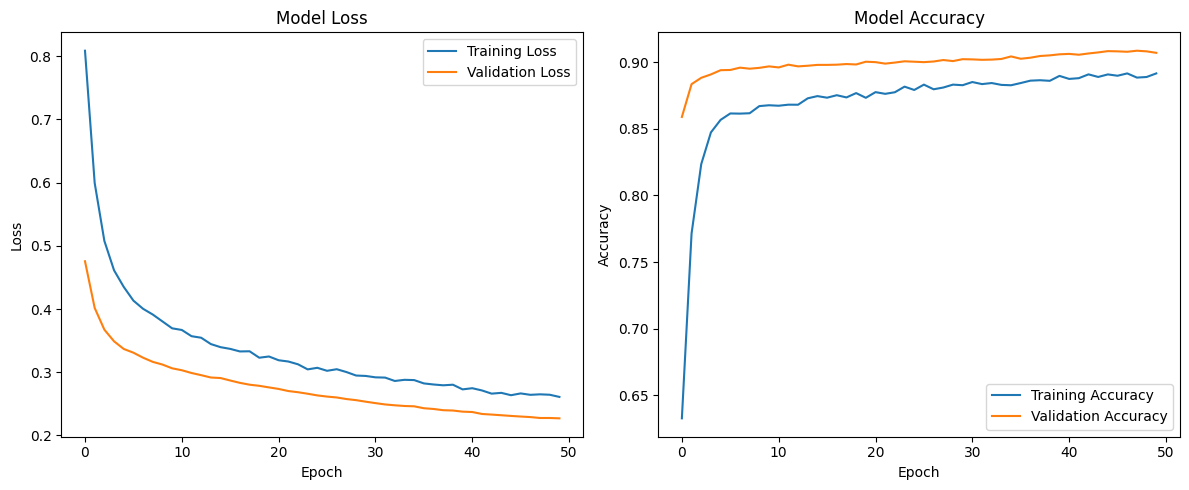

In [7]:
import matplotlib.pyplot as plt

# Plot training history

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, auc

# Predictions

pred = model.predict(test_data_scaled)
y_pred = (pred > 0.5).astype(int)

cm = confusion_matrix(test_labels, y_pred)
accuracy = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
fpr, tpr, thresholds = roc_curve(test_labels, pred)
roc_auc = auc(fpr, tpr)


422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [9]:
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

F1-Score: 0.7597
Accuracy: 0.9045


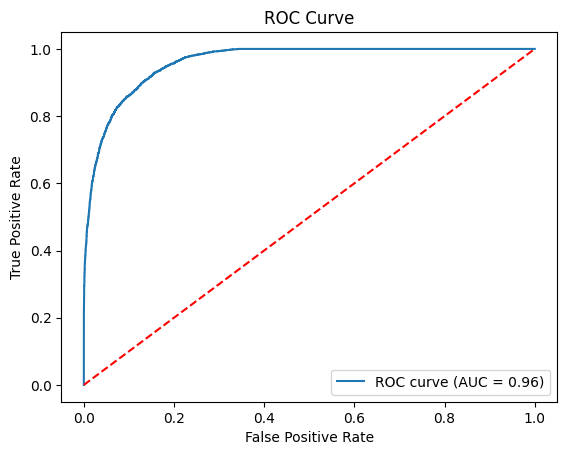

In [10]:
# Plot ROC curve
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Text(70.72222222222221, 0.5, 'True Label')

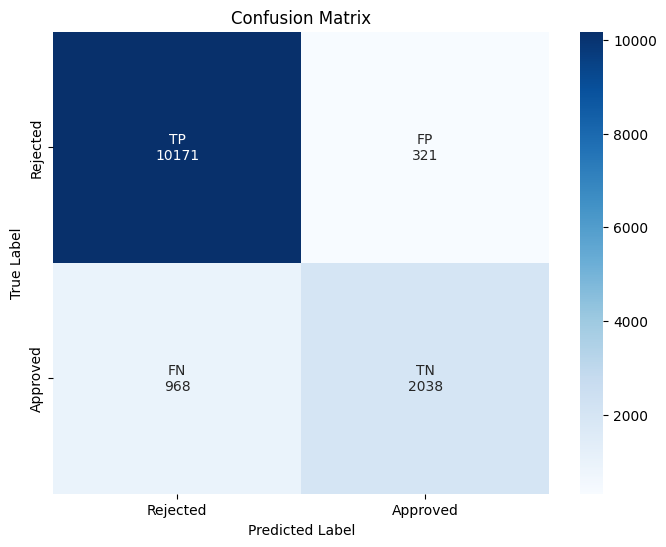

In [11]:
import seaborn as sns
import numpy as np

# Plot confusion matrix

plt.figure(figsize=(8, 6))

entries = np.array([[f'TP\n{cm[0][0]}', f'FP\n{cm[0][1]}'],
                    [f'FN\n{cm[1][0]}', f'TN\n{cm[1][1]}']])

sns.heatmap(cm, annot=entries, fmt="", cmap="Blues", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")